In [230]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

In [362]:
filename = './data.dat'

time=[]
temp=[]
pressure=[]
humidity=[]
with open(filename) as f:
    for line in f:
        l = line.split()
        time.append(datetime.fromtimestamp(float(l[0])))
        temp.append(float(l[1]))
        pressure.append(float(l[2])/101325.0)
        humidity.append(float(l[3]))

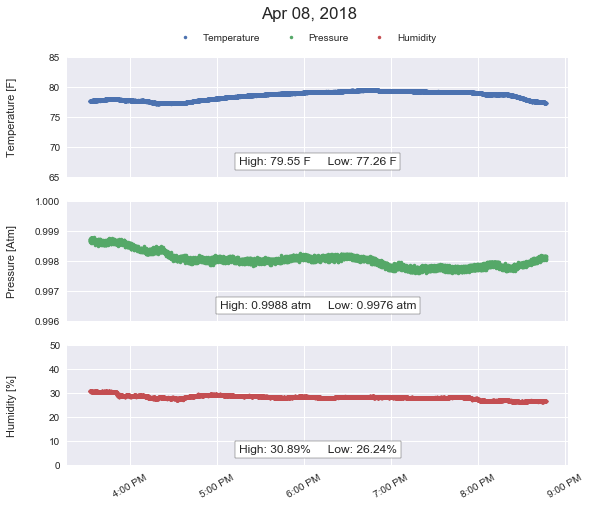

In [363]:
plt.style.use('seaborn')
fig, axs = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(8,7)
fig.subplots_adjust(hspace=0.2)
bbox_props = dict(boxstyle="round4", fc="cyan", ec="b", lw=2)


if min(time).day != max(time).today().day:
    title_date = min(time).strftime('%b %d, %Y to ') + max(time).strftime('%b %d, %Y to')
else:
    title_date = min(time).strftime('%b %d, %Y')
    
plt.suptitle(title_date)

l1, = axs[0].plot(time,temp, marker='.',color='C0',label='Temperature',linestyle='none')
axs[0].set_ylabel('Temperature [F]')
axs[0].set_ylim(65,85)
axs[0].get_yaxis().set_label_coords(-0.1,0.5)

l2, = axs[1].plot(time,pressure, marker='.',color='C1',label='Pressure',linestyle='none')
axs[1].set_ylabel('Pressure [Atm]')
axs[1].set_ylim(0.996,1.0)
axs[1].get_yaxis().set_label_coords(-0.1,0.5)

l3, = axs[2].plot(time,humidity, marker='.',color='C2',label='Humidity',linestyle='none')
axs[2].set_ylabel('Humidity [%]')
axs[2].set_ylim(0,50)
axs[2].get_yaxis().set_label_coords(-0.1,0.5)
axs[2].get_xaxis().set_major_formatter(mdates.DateFormatter('%-I:%M %p'))

ann_x = 0.5
ann_y = 0.13

ann = axs[0].annotate("High: "+"{0:.2f}".format(max(temp))+" F     Low: "+"{0:.2f}".format(min(temp))+" F",fontsize=12,
                  fontweight='light',
                  xy=(ann_x, ann_y), xycoords='axes fraction',
                  xytext=(ann_x, ann_y), textcoords='axes fraction',
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="square", fc="w"),
                  )

ann = axs[1].annotate("High: "+"{0:.4f}".format(max(pressure))+" atm     Low: "+"{0:.4f}".format(min(pressure))+" atm",fontsize=12,
                  fontweight='light',
                  xy=(ann_x, ann_y), xycoords='axes fraction',
                  xytext=(ann_x, ann_y), textcoords='axes fraction',
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="square", fc="w"),
                  )

ann = axs[2].annotate("High: "+"{0:.2f}".format(max(humidity))+"%     Low: "+"{0:.2f}".format(min(humidity))+"%",fontsize=12,
                  fontweight='light',
                  xy=(ann_x, ann_y), xycoords='axes fraction',
                  xytext=(ann_x, ann_y), textcoords='axes fraction',
                  size=12, va="center", ha="center",
                  bbox=dict(boxstyle="square", fc="w"),
                  )

labels = axs[2].get_xticklabels()
plt.setp(labels, rotation=30)

plt.figlegend((l1,l2,l3), ('Temperature','Pressure','Humidity'), loc=(0.29,0.908),ncol=3, fancybox=True)
plt.show()